## Introduction:

In this section, we would look into what is taught to in class and explore the NUMERIC data from our data set. By applying Linear Regression on our variables, we would find out how well does the NUMERIC data perform in predicting G3.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
df = pd.read_csv('student-por.csv', sep=';') 

In [3]:
df.head()
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
df.info() 
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
new_df = pd.DataFrame(df[['age', 'traveltime', 'studytime', 'failures','absences','G1','G2','G3']])

In [6]:
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   traveltime  649 non-null    int64
 2   studytime   649 non-null    int64
 3   failures    649 non-null    int64
 4   absences    649 non-null    int64
 5   G1          649 non-null    int64
 6   G2          649 non-null    int64
 7   G3          649 non-null    int64
dtypes: int64(8)
memory usage: 40.7 KB


,age,traveltime,studytime,failures,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.568567,1.930663,0.221880,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.748660,0.829510,0.593235,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,2.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,3.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
new_df.head()

,age,traveltime,studytime,failures,absences,G1,G2,G3
0,18,2,2,0,4,0,11,11
1,17,1,2,0,2,9,11,11
2,15,1,2,0,6,12,13,12
3,15,1,3,0,0,14,14,14
4,16,1,2,0,0,11,13,13


## Multi-Variate Linear Regression

We will start by setting up a Multi-Variate Linear Regression problem.   

Response Variable : **G3**     
Predictor Feature : **age, traveltime, studytime, failures, absences, G1, G2**       

> Regression Model : Total = $a_1$ $\times$ age + $a_2$ $\times$ traveltime + $a_3$ $\times$ studytime + $a_4$ $\times$ failures + $a_5$ $\times$ absences + $a_6$ $\times$ G1 + $a_7$ $\times$ G2 + $b$  

Extract the variables and the associated data as a Pandas `DataFrame`.

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(new_df['G3'])
X = pd.DataFrame(new_df[["age", "traveltime", "studytime", "failures", "absences", "G1", "G2"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (486, 1) (486, 7)
Test Set  : (163, 1) (163, 7)


In [10]:
# Summary Statistics for Response
y_train.describe()

,G3
count,486.000000
mean,11.971193
std,3.138585
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


In [11]:
# Summary Statistics for Predictors
X_train.describe()

,age,traveltime,studytime,failures,absences,G1,G2
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,16.707819,1.567901,1.925926,0.205761,3.676955,11.405350,11.625514
std,1.189742,0.736751,0.833986,0.569724,4.616930,2.791425,2.852325
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,0.000000,0.000000,10.000000,10.000000
50%,17.000000,1.000000,2.000000,0.000000,2.000000,11.000000,12.000000
75%,18.000000,2.000000,2.000000,0.000000,6.000000,13.000000,13.000000
max,21.000000,4.000000,4.000000,3.000000,32.000000,19.000000,19.000000


<AxesSubplot:>

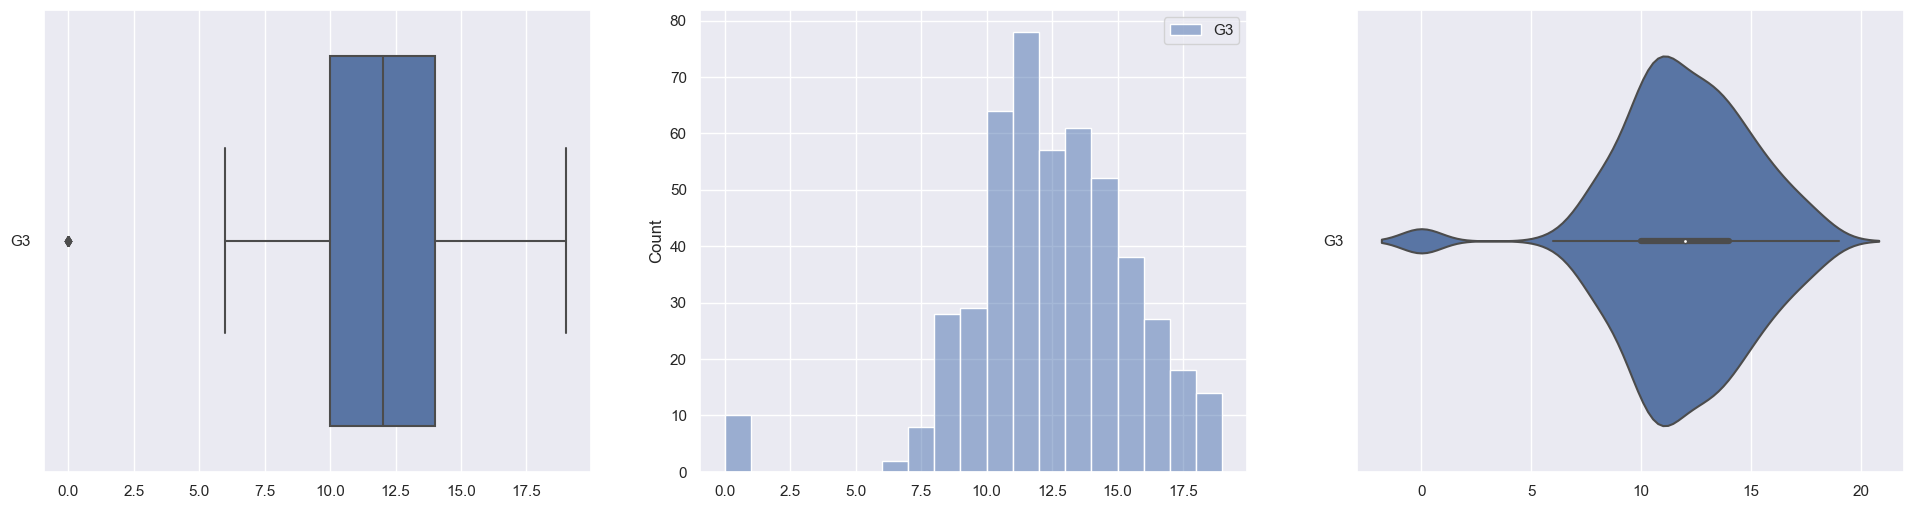

In [12]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

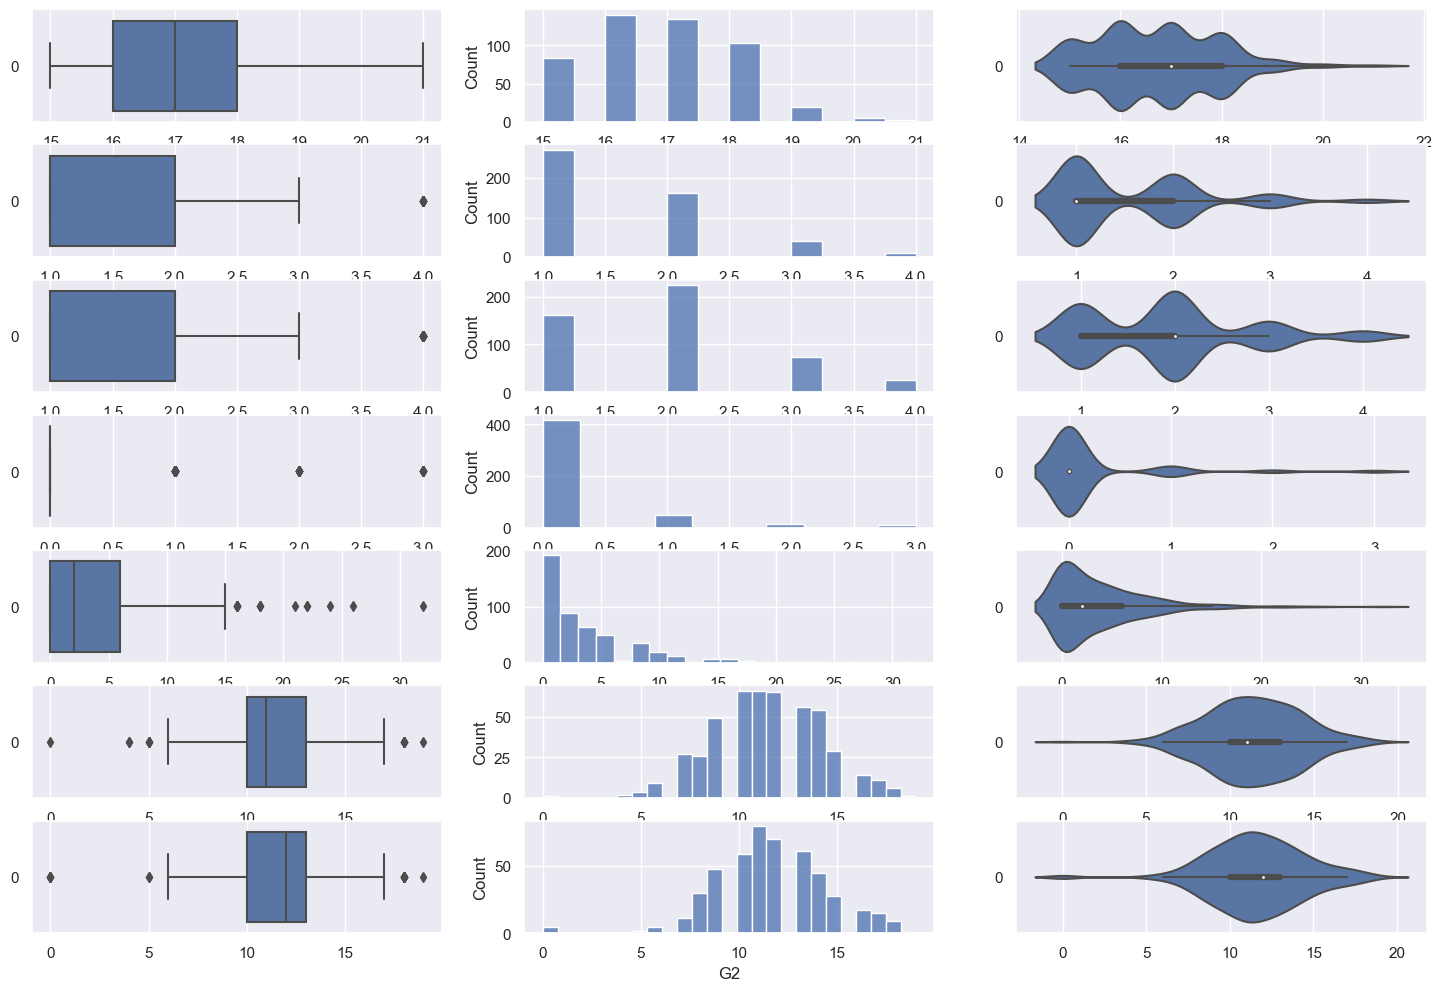

In [13]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(7, 3, figsize=(18, 12))

count = 0
for var in X_train:
    sb.boxplot(data = X_train[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train[var], ax = axes[count,1])
    sb.violinplot(data = X_train[var], orient = "h", ax = axes[count,2])
    count += 1

<AxesSubplot:>

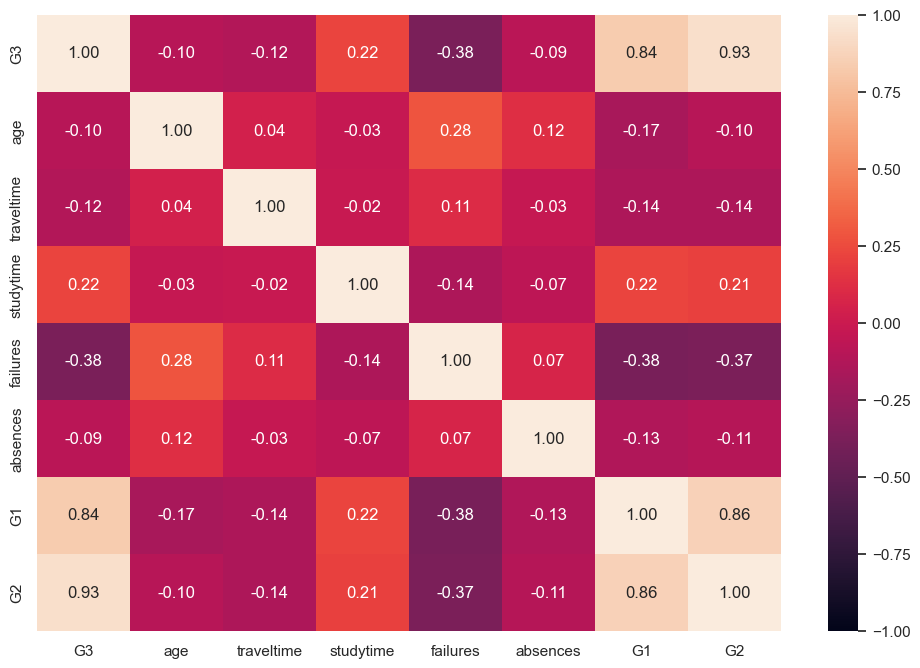

In [14]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

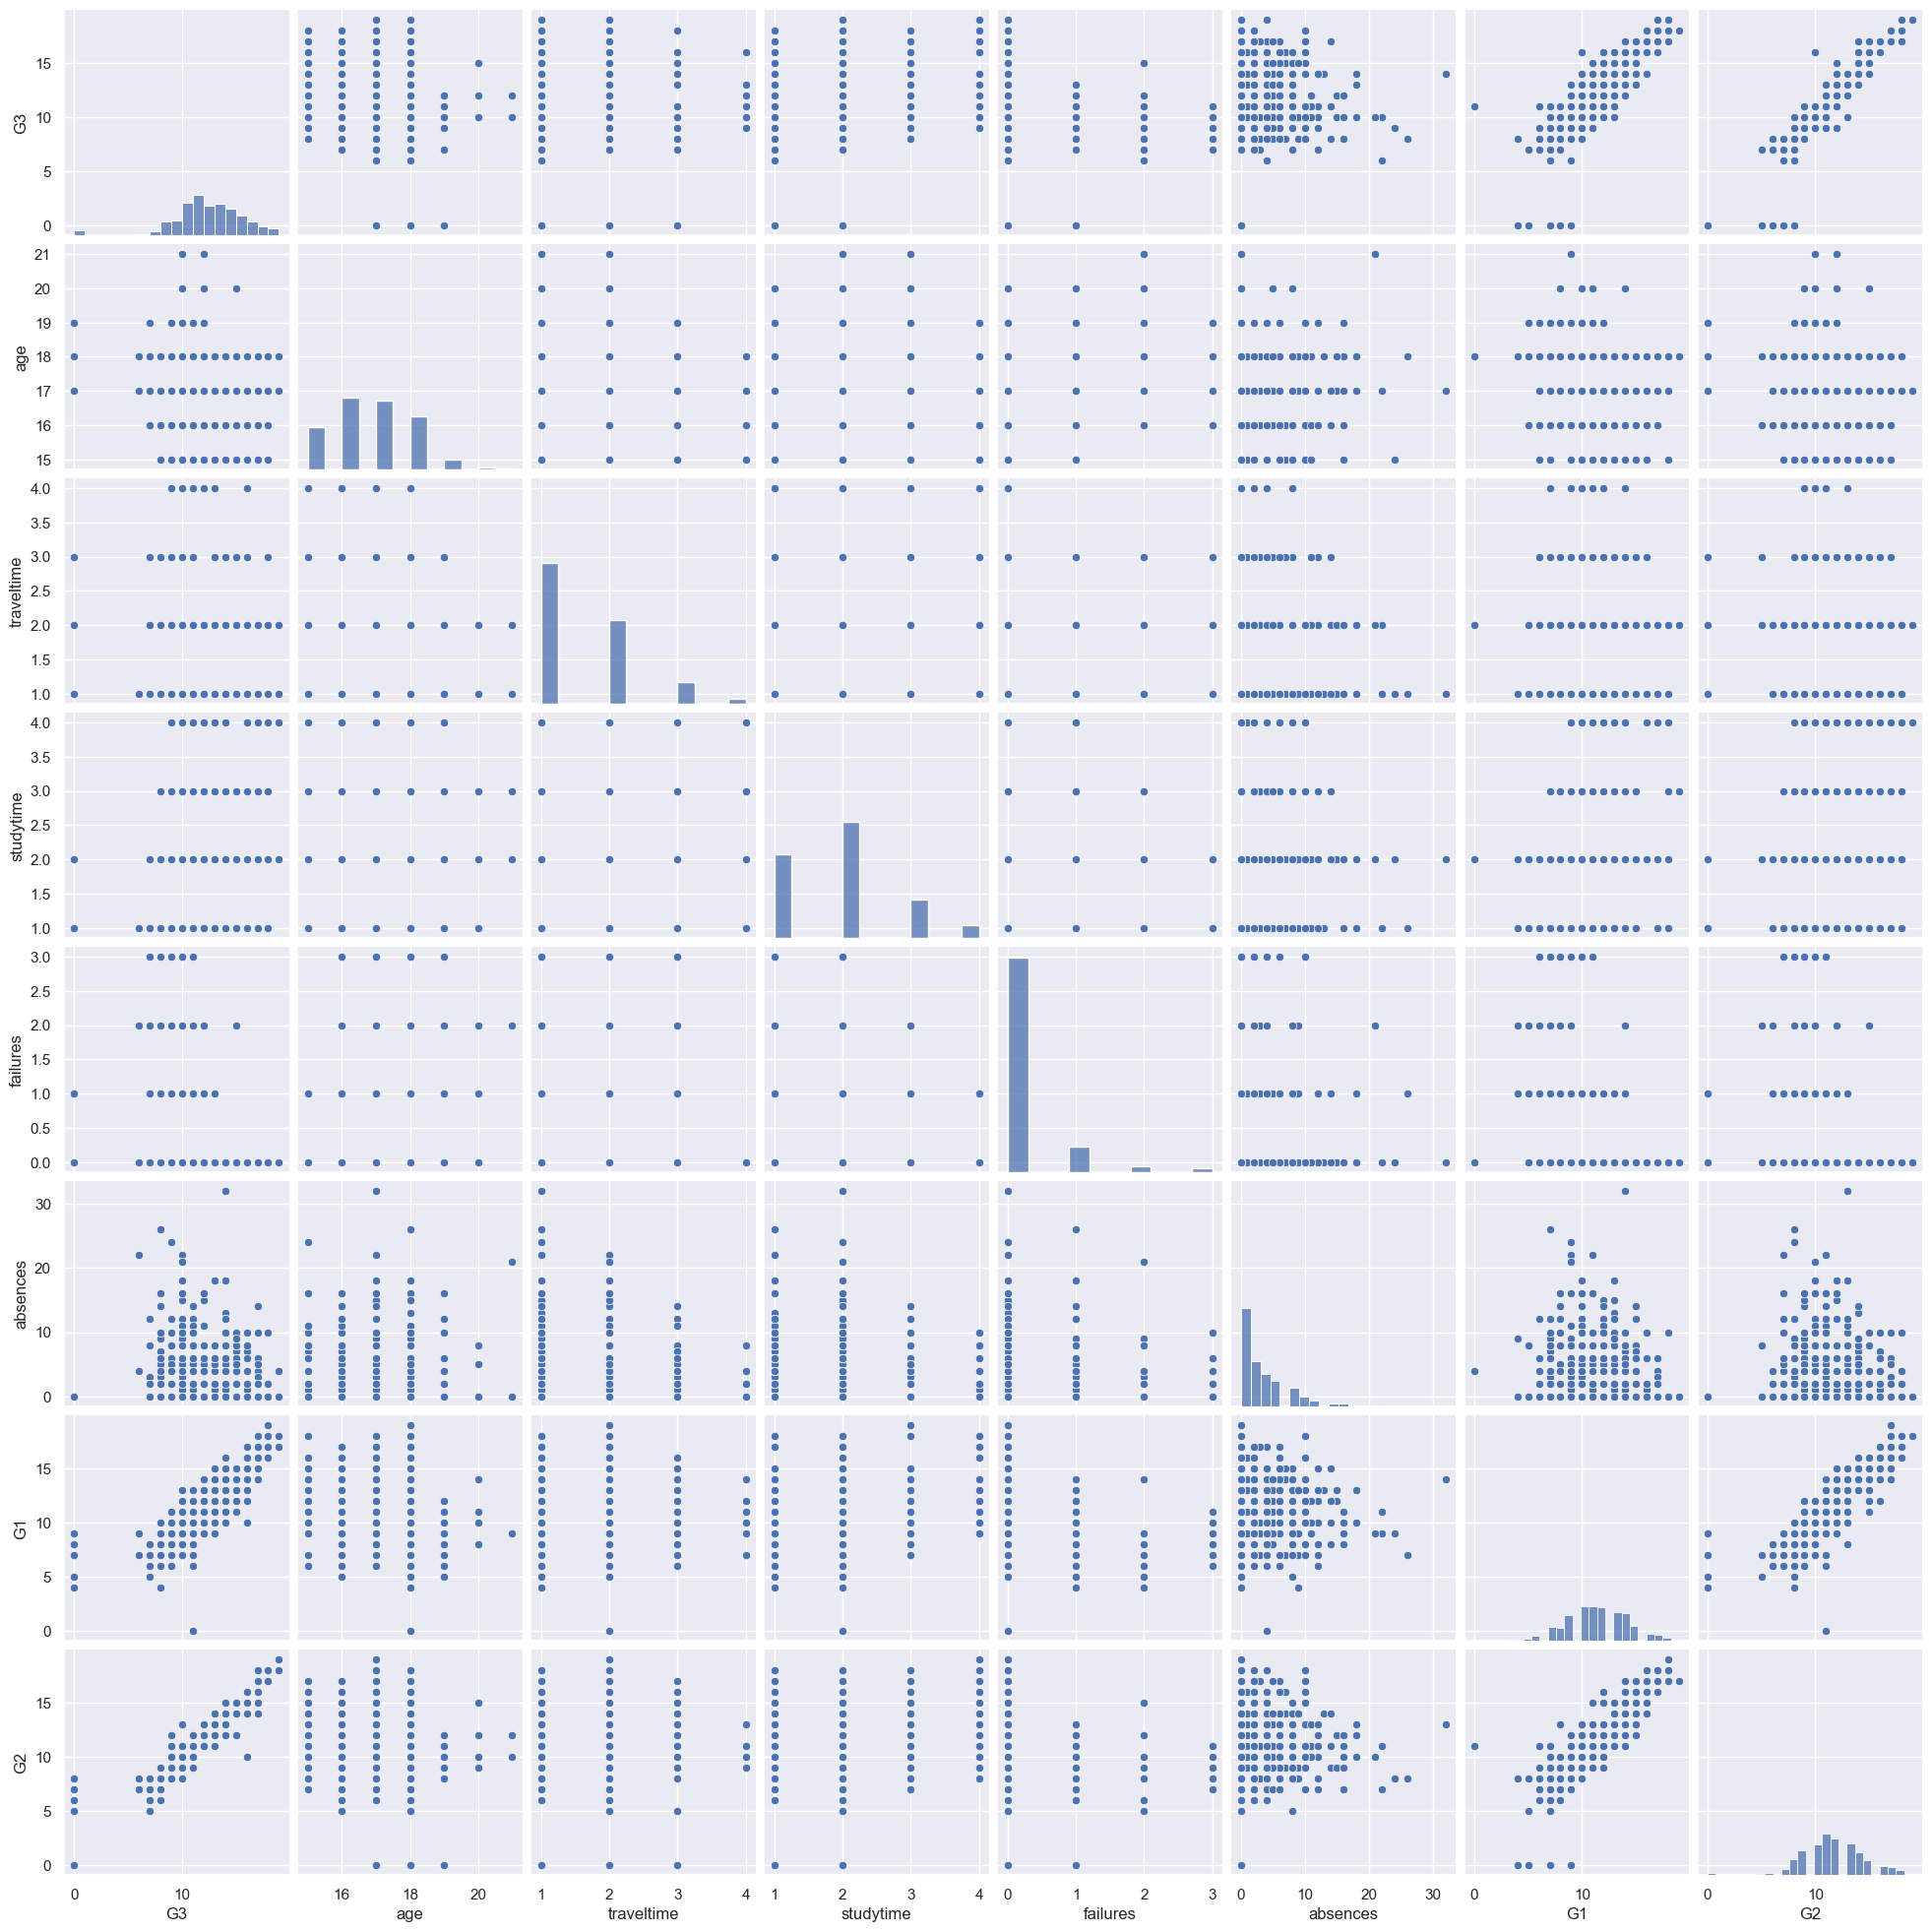

In [15]:
# Relationship between Predictors and responses
sb.pairplot(data = trainDF)

In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-0.62137777]
Coefficients of Regression 	: a =  [[ 0.01614297  0.07582345  0.07136179 -0.15272919  0.01410366  0.138645
   0.90015877]]



,Predictors,Coefficients
0,age,0.016143
1,traveltime,0.075823
2,studytime,0.071362
3,failures,-0.152729
4,absences,0.014104
5,G1,0.138645
6,G2,0.900159


Response Variable : **G3**     
Predictor Feature : **age, traveltime, studytime, failures, absences, G1, G2** 

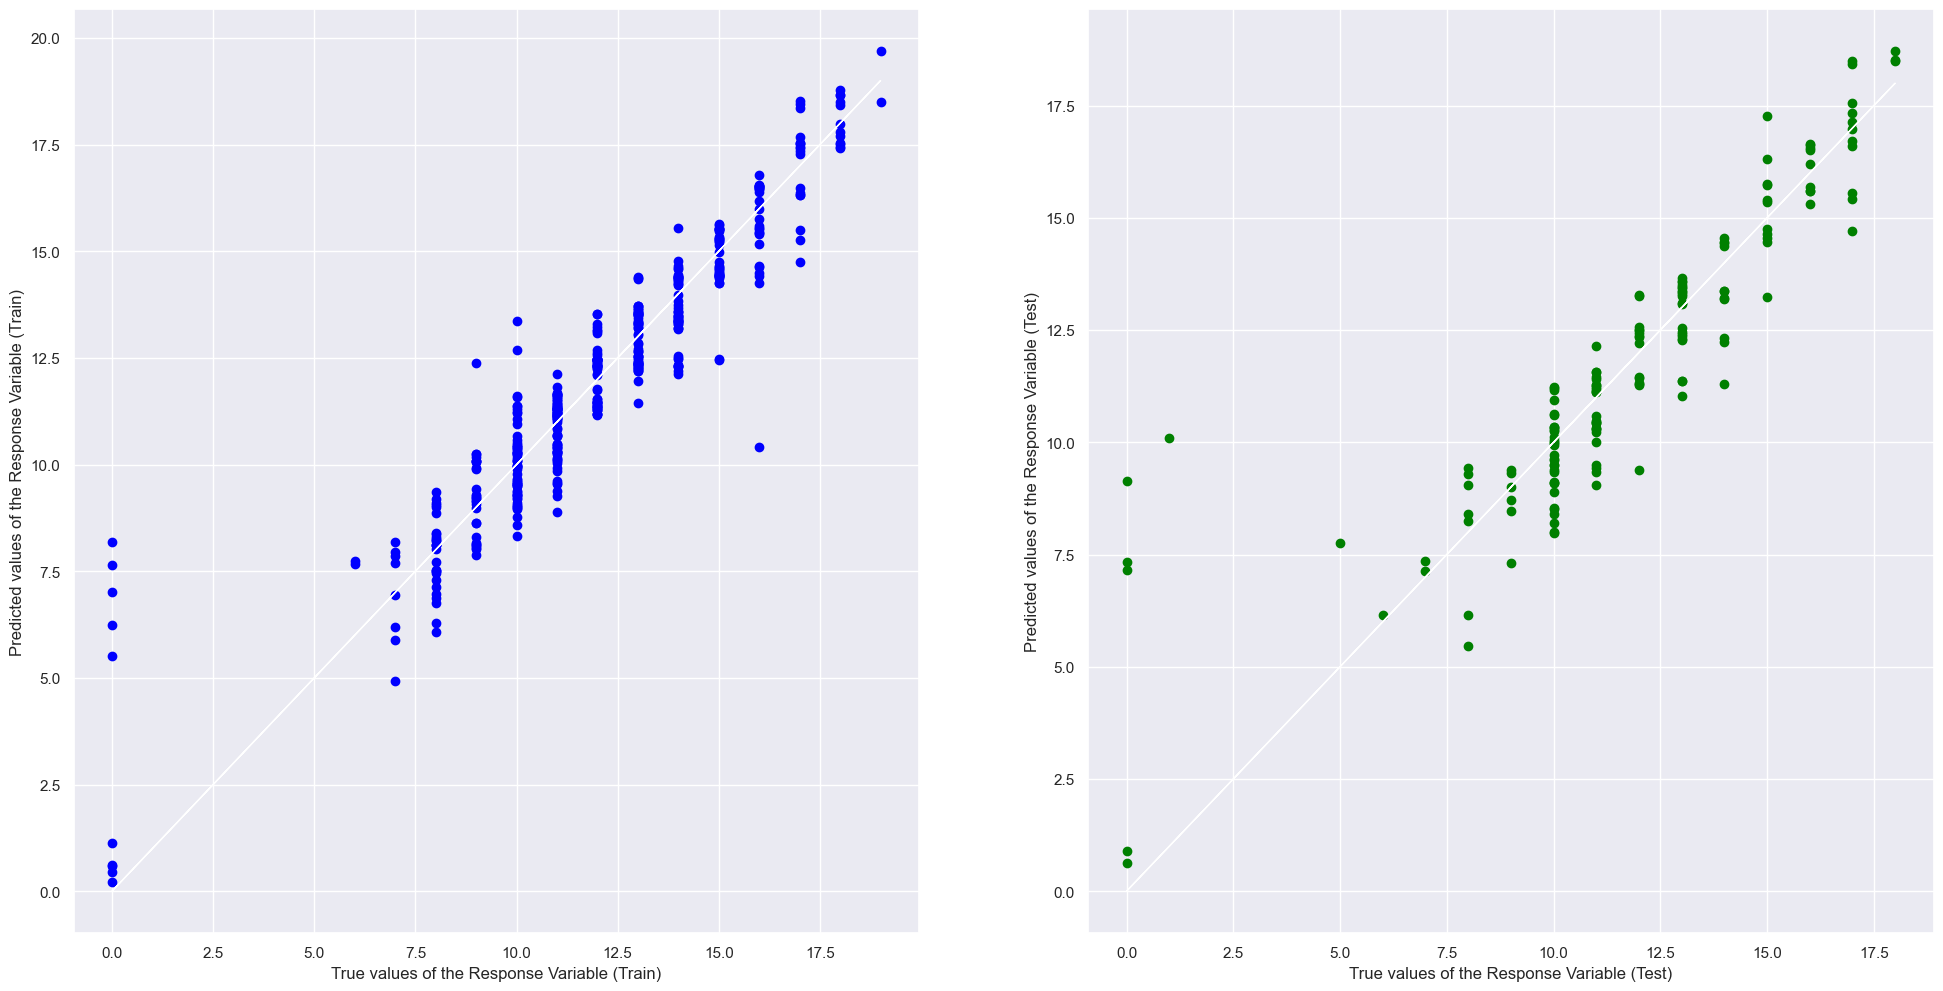

In [17]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [18]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8766396852939977
Mean Squared Error (MSE) 	: 1.2126869000306661

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7871700007140835
Mean Squared Error (MSE) 	: 2.5819645711104577



### Conclusion:

Using these 7 numeric variables from the dataset(age, traveltime, studytime, failures, absences, G1, G2) and applying the linear regression on them, we found that it has a relatively strong positive corelation with G3 as its R^2 value is 0.88(train) and 0.79(test). However, we cannot just totally use these variables as a whole in our prediction of G3 as their Mean Squared Error is quite high of 1.21(train) and 2.58(test). As such, we would look into the individual numerical variables against G3 in our next analysis to find out which of the numeric variables has the best corelation in predicting G3.